In [7]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
seed = 42
np.random.seed(seed)

### Gerando os exemplos de treinamento e validação.

In [3]:
# Generate sample data.
N = 40

# Generate uniformly distributed from -3 to 3.
X_train = np.sort((6*np.random.rand(N, 1) - 3), axis=0)
# True function.
y = 2.0 + X_train + 0.5*X_train**2
# Noisy version.
y_noisy = y + np.random.randn(N,1)

# Generate validation examples.
X_test = np.linspace(-3, 3, 100).reshape(100, 1)
# True function.
y_test = 2.0 + X_test + 0.5*X_test**2
# Noisy version.
y_test_noisy = y_test + np.random.randn(100,1)

### Comparando os tipos dos pesos.

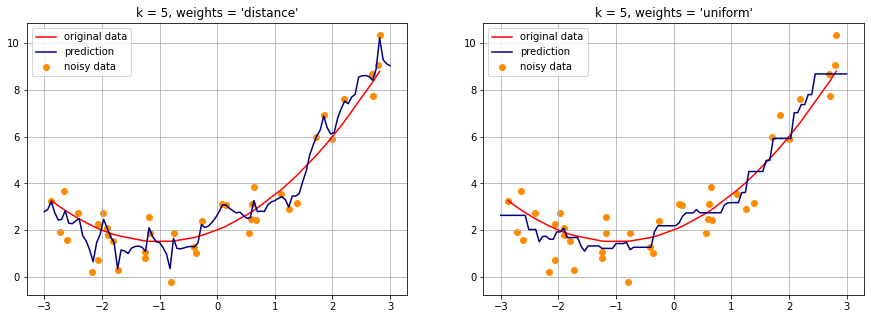

In [4]:
# Fit regression model
k = 5

plt.figure(figsize=(15,5))
for i, weights in enumerate(['distance', 'uniform']):
    # Instantiate.
    knn = KNeighborsRegressor(k, weights=weights)
    # Train model.
    knn.fit(X_train, y_noisy)
    # Predict.
    y_pred = knn.predict(X_test)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train, y_noisy, color='darkorange', label='noisy data')
    plt.plot(X_train, y, color='red', label='original data')
    plt.plot(X_test, y_pred, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.grid()
    plt.title("k = %i, weights = '%s'" % (k, weights))

# Save figure
#plt.savefig("knn_regression.png", dpi=600)
#Show the plot.
plt.show()

+ Pesos uniformes resultam em uma aproximação mais suave, pois o valor de saída será a média dos k valores. 
+ Porém, com pesos inversamente proporcionais à distância, amostras próximas ao exemplo de entrada terão grande influência no valor de saída, fazendo com que ele seja bem próximo desse valor.
+ Ou seja, com pesos inversamente proporcionais à distância a chance de sobreajuste é maior.

### Variando o valor de k entre 1 e 40

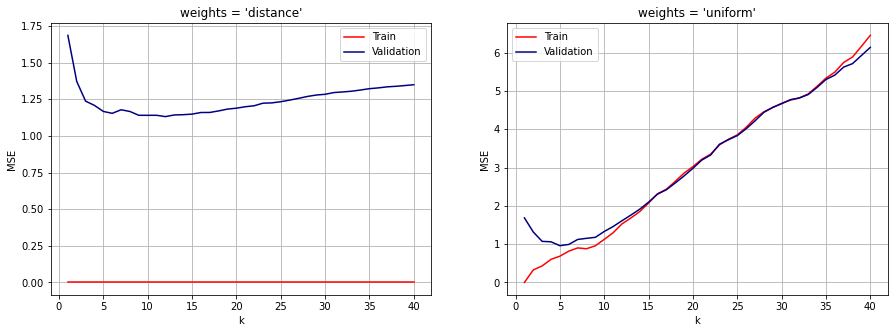

In [8]:
acc_test = []
acc_train = []
neighbours = range(1,41)
plt.figure(figsize=(15,5))
for i, weights in enumerate(['distance', 'uniform']):
    acc_test.append([])
    acc_train.append([])
    for k in neighbours:
        # Instantiate.
        knn = KNeighborsRegressor(k, weights=weights)
        # Train model.
        knn.fit(X_train, y_noisy)
        # Predict.
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        
        # calculate score.
        acc_test[i].append(mean_squared_error(y_test_noisy, y_pred_test))
        acc_train[i].append(mean_squared_error(y_noisy, y_pred_train))          

    plt.subplot(1, 2, i + 1)
    plt.plot(neighbours, acc_train[i], color='red', label='Train')
    plt.plot(neighbours, acc_test[i], color='navy', label='Validation')
    plt.axis('tight')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.title("weights = '%s'" % (weights))

# Save figure
#plt.savefig("knn_regression.png", dpi=600)
#Show the plot.
plt.show()

+ Diferentemente do que vimos com a regressão linear, o modelo começa sobreajustando e conforme k aumenta, tente a subajustar.

### Treinando com o melhor número de vizinhos, k.

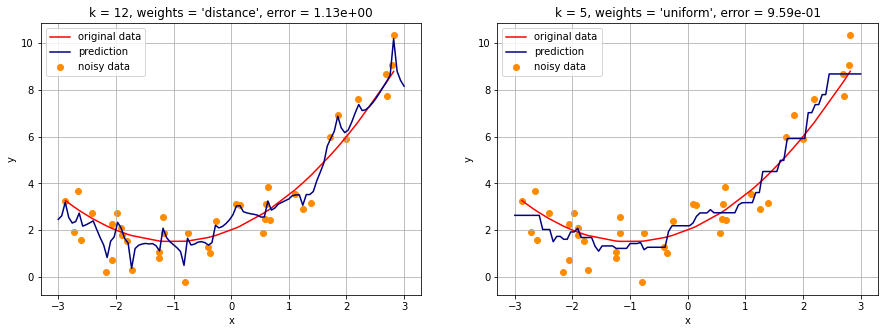

In [9]:
plt.figure(figsize=(15,5))
for i, weights in enumerate(['distance', 'uniform']):
    
    k = np.argmin(acc_test[i])+1
    
    # Instantiate.
    knn = KNeighborsRegressor(k, weights=weights)
    # Train model.
    knn.fit(X_train, y_noisy)
    # Predict.
    y_pred = knn.predict(X_test)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train, y_noisy, color='darkorange', label='noisy data')
    plt.plot(X_train, y, color='red', label='original data')
    plt.plot(X_test, y_pred, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title("k = %i, weights = '%s', error = %1.2e" % (k, weights, acc_test[i][k-1]))

# Save figure
#plt.savefig("knn_regression.png", dpi=600)
#Show the plot.
plt.show()